In [4]:
import pandas as pd
df = pd.read_csv('df_final_data.csv')
df

,client_id,visitor_id,visit_id,process_step,date_time,Variation_x,Variation_y,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321190,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test,Test,10.0,121.0,55.0,U,2.0,153238.83,3.0,6.0
321191,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
321192,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
321193,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0


In [9]:
def age_to_category(age):
    category = ''
    if age < 10:
        category = 'young'
    elif 10 <= age < 20:
        category = 'teenager'
    elif 20 <= age < 50:
        category = 'adult'
    elif age >= 50:
        category = 'senior'
    return category

df['age_category'] = df['clnt_age'].apply(lambda x : age_to_category(x))
df.to_csv('df_final_data_with_age.csv', index=False)

In [6]:
map_gender = {'M':'M','F':'F','U':'U','X':'F'}
df['gendr'] = df['gendr'].map(map_gender)


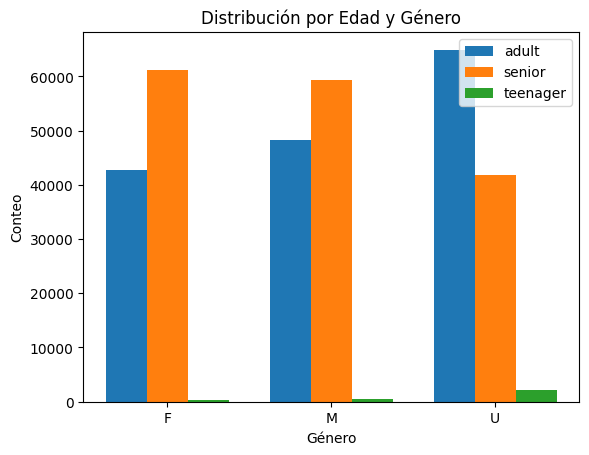

In [7]:
import matplotlib.pyplot as plt
import numpy as np

df_count = df.groupby(['age_category','gendr'])['client_id'].count().reset_index(name='count')
df_count.sort_values(by='count', ascending=False,ignore_index=True)

age_categories = df_count['age_category'].unique()
gendr_categories = df_count['gendr'].unique()

x = np.arange(len(gendr_categories))
ancho_barra = 0.25

fig, ax = plt.subplots()
for i, age in enumerate(age_categories):
    values = df_count[df_count['age_category'] == age]['count']
    ax.bar(x + i * ancho_barra, values, ancho_barra, label=age)

ax.set_xlabel('Género')
ax.set_ylabel('Conteo')
ax.set_title('Distribución por Edad y Género')
ax.set_xticks(x + ancho_barra * (len(age_categories) - 1) / 2)
ax.set_xticklabels(gendr_categories)
ax.legend()

# Mostrar el gráfico
plt.show()

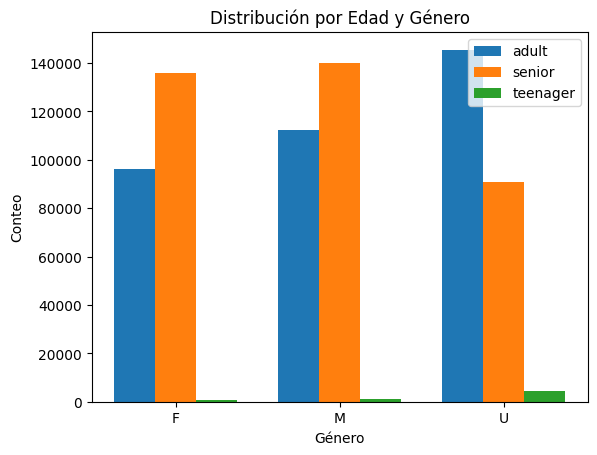

In [8]:
import matplotlib.pyplot as plt
import numpy as np

df_count = df.groupby(['age_category','gendr'])['num_accts'].sum().reset_index(name='count')
df_count.sort_values(by='count', ascending=False,ignore_index=True)

age_categories = df_count['age_category'].unique()
gendr_categories = df_count['gendr'].unique()

x = np.arange(len(gendr_categories))
ancho_barra = 0.25

fig, ax = plt.subplots()
for i, age in enumerate(age_categories):
    values = df_count[df_count['age_category'] == age]['count']
    ax.bar(x + i * ancho_barra, values, ancho_barra, label=age)

ax.set_xlabel('Género')
ax.set_ylabel('Conteo')
ax.set_title('Distribución por Edad y Género')
ax.set_xticks(x + ancho_barra * (len(age_categories) - 1) / 2)
ax.set_xticklabels(gendr_categories)
ax.legend()

# Mostrar el gráfico
plt.show()